In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import string
import pickle as pkl
from collections import OrderedDict 
from scipy.stats import beta

from scipy.special import btdtri

C:\Users\shmueli\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [3]:
fig1_data = pd.read_csv("figure1_data.csv")
fig2_data = pd.read_csv("figure2_data.csv")
fig3_data = pd.read_csv("figure3_data.csv")

# General ploting definitions

In [4]:
titles = {'battery':'Battery',
'rr':'Respiratory Rate',
'MAPrs':'Mean Arterial Pressure',
'pp':'Pulse Pressure',
'spo2':'Oxygen Saturation',
'sbp':'Systolic Blood Pressure',
'dbp':'Diastolic Blood Pressure',
'hr':'Heart Rate',
'hrv': 'Heart Rate Variability',
'sv':'Stroke Volume',
'svr':'Systemic Vascular Resistance',
'co': 'Cardiac Output',
'ci':'Cardiac Index',
'temp':'Skin Temperature',
'movement':'Movement'}

In [5]:
letters = [string.ascii_lowercase[i] for i in range(22)]

# Figure 1 - Percentage  of  change  in  chest-patch  indicators compared to their levels  observed  on the  day prior  vaccination

In [16]:
def plot_figure1(axes_dict,df,interval_since_vaccine,d_ticks,color_indicator=0):
    
    sns.set(font_scale=2.5,style='white')
    columns_to_plot = list(axes_dict.keys())
    
    colors_dict = {}
    palette = sns.color_palette('tab10')+sns.color_palette('hsv')+sns.color_palette('tab10')
    for i in range(len(columns_to_plot)):
        colors_dict[columns_to_plot[i]] = palette[i+color_indicator]
    

    num_rows = max([val[0] for val in axes_dict.values()]) + 1
    num_cols = max([val[1] for val in axes_dict.values()]) + 1
    main_fig, axs = plt.subplots(num_rows,num_cols,figsize=(14*num_cols,6*num_rows))
    main_fig.suptitle('n=160',x=0.5,y=0,fontweight="bold")
    cnt_letter = 0
    
    for col in columns_to_plot:
            g = sns.lineplot(data=df, x=interval_since_vaccine,
                         y=col,
                         ci=90,
                         sort=True, 
                         color = colors_dict[col], 
                         ax = axs[axes_dict[col]])
            axs[axes_dict[col]].set_xticks(range(0,84,12))
            axs[axes_dict[col]].axvline(48,ls='-',c='red')
            axs[axes_dict[col]].axvline(24,ls='-',c='red')

            axs[axes_dict[col]].set_ylabel('% Change in\n'+titles[col])
            axs[axes_dict[col]].set_ylim(-d_ticks[col],d_ticks[col])
            axs[axes_dict[col]].axhline(0,ls='--',c='black')

            axs[axes_dict[col]].margins(x=0)
            axs[axes_dict[col]].set_title(letters[cnt_letter], x=-0.16,y=1.08,fontweight="bold")
            cnt_letter += 1

            if axes_dict[col][0] == num_rows - 1:
                axs[axes_dict[col]].set_xlabel('Hours Post Vaccincation',fontsize=24)

            else: 
                axs[axes_dict[col]].set_xlabel('')
                
    
    main_fig.tight_layout(pad=2.0)
    main_fig.savefig('Figure1.pdf', dpi = 300, bbox_inches="tight")
    plt.show()

In [7]:
ticks_fig1 = {'rr':8,'spo2':1.45,'hr':14,'hrv':150,'sbp':7.5,'dbp':6,'pp':8,'MAPrs':8,'sv':4,'co':20,'ci':18,'svr':10,'temp':1.1,'movement':1000}
indicators_fig1 = ['rr', 'spo2', 'hr', 'co', 'sbp', 'dbp', 'temp','svr']

In [8]:
#set each indicator color
colors_dict = {}
palette = sns.color_palette('tab10')+sns.color_palette('hsv')+sns.color_palette('tab10')
for i in range(len(indicators_fig1)):
    colors_dict[indicators_fig1[i]] = palette[i]

In [9]:
axes_fig1 = {'temp':(0,0), 
             'hr':(0,1), 
             'co':(1,0), 
             'svr':(1,1),
             'sbp':(2,0),
             'dbp':(2,1),
             'rr':(3,0),
             'spo2':(3,1)
            }

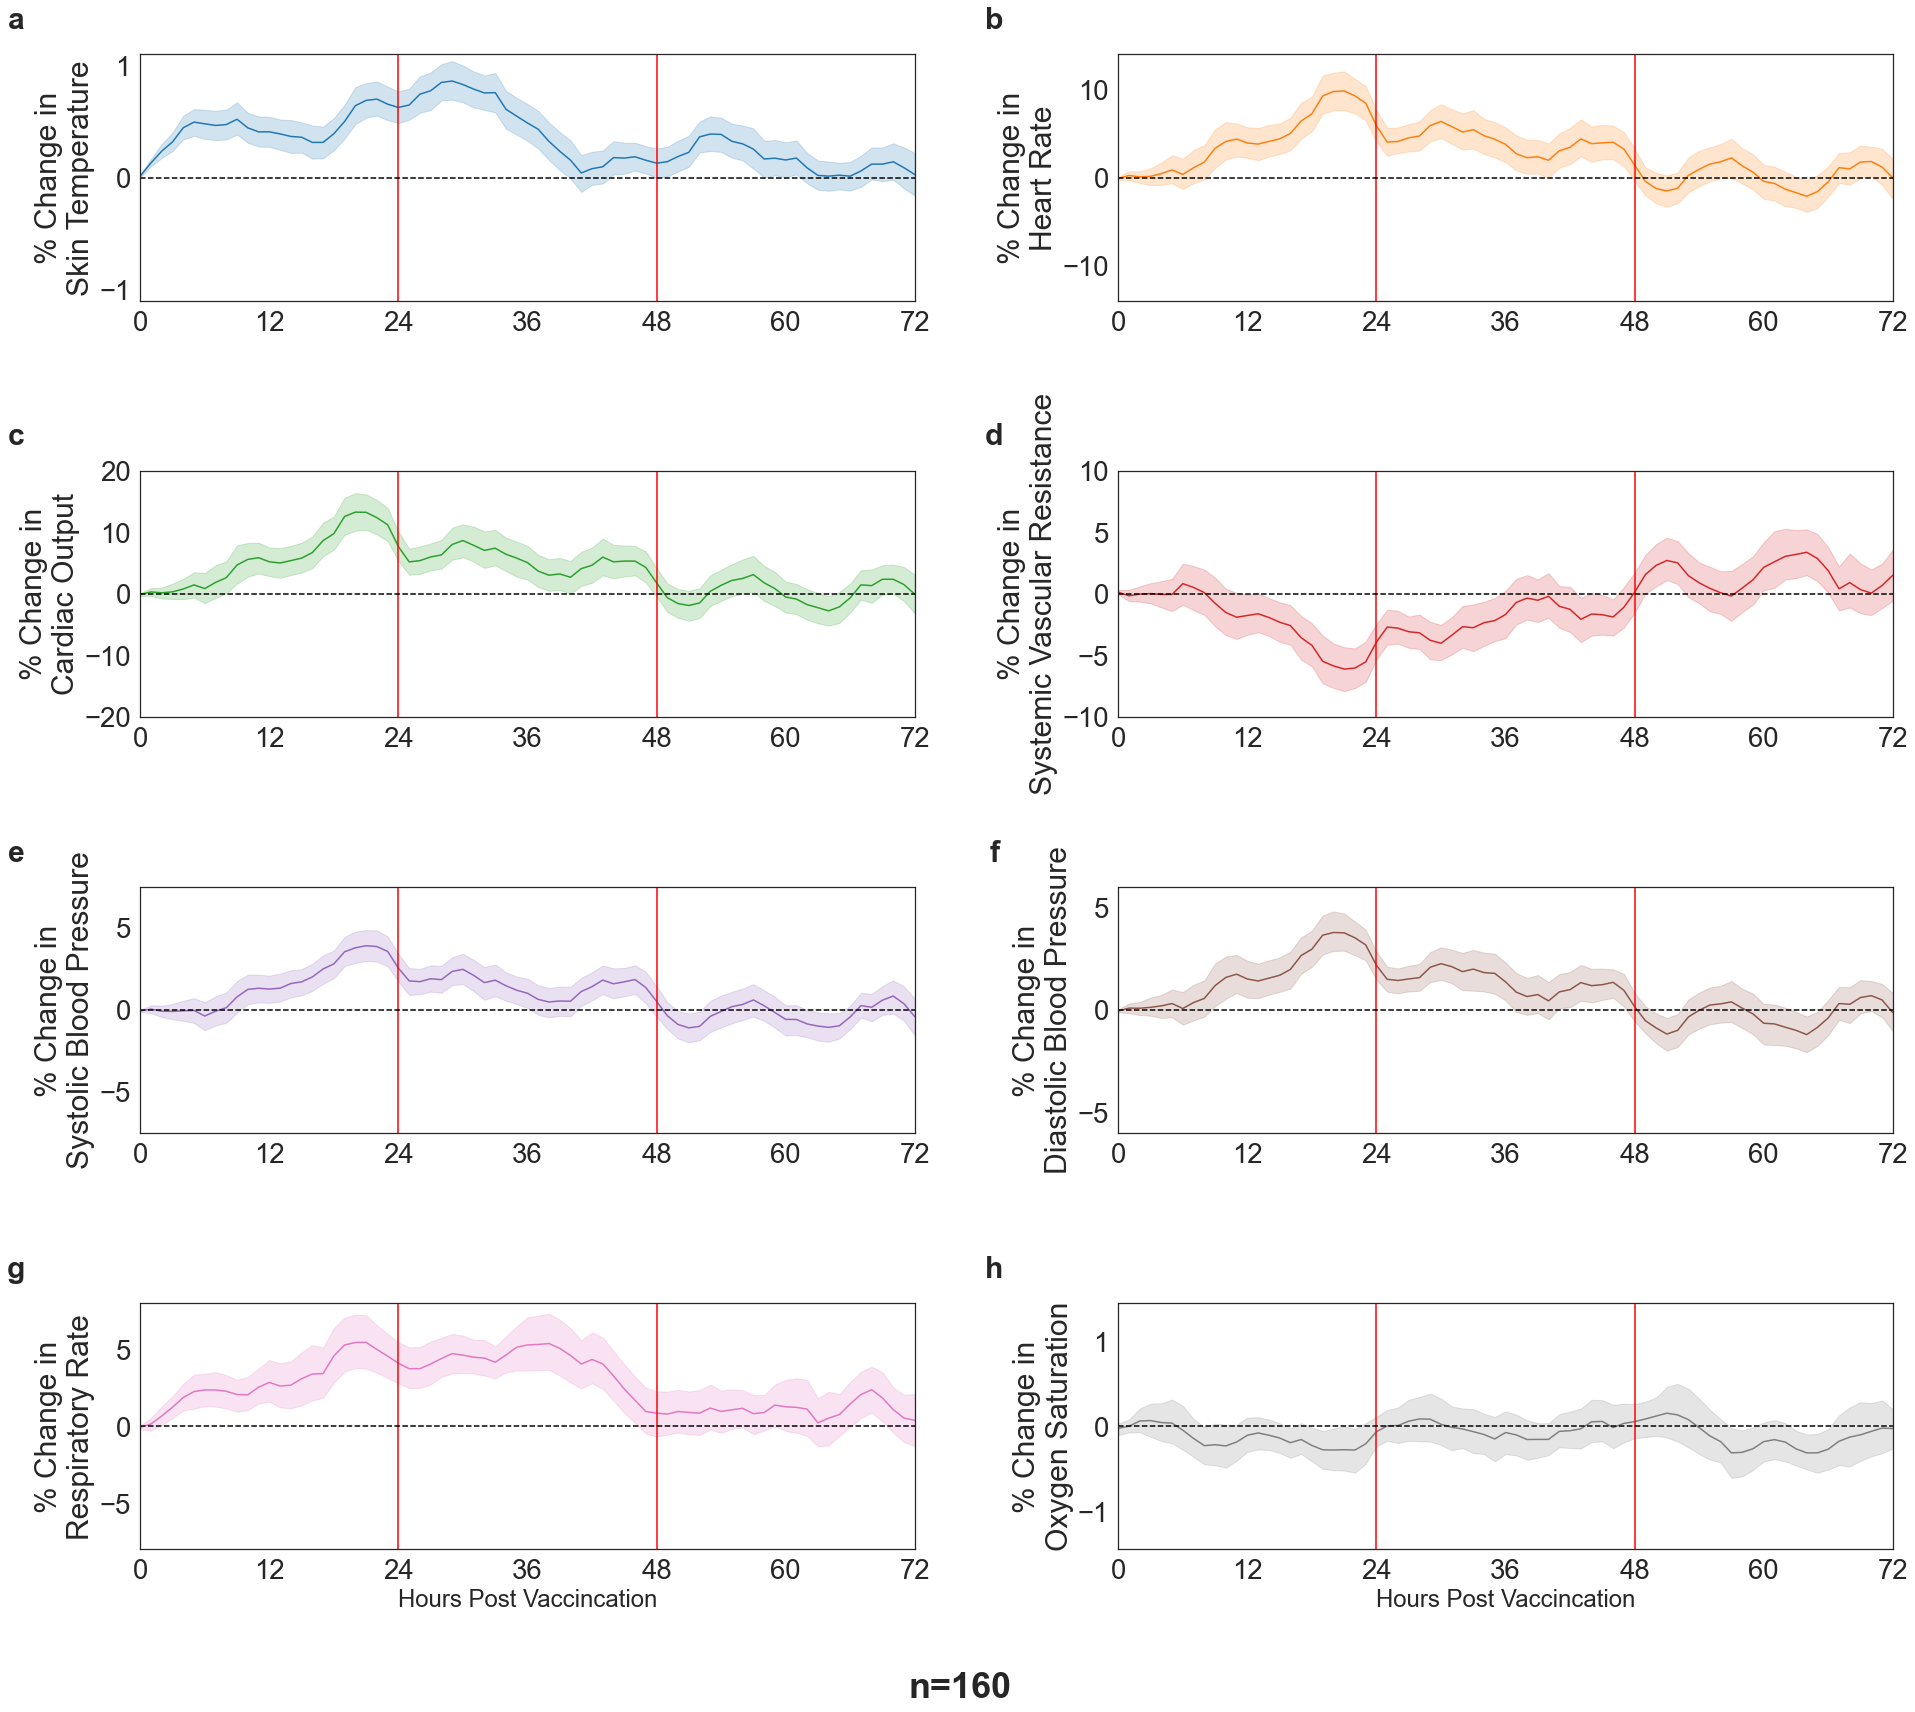

In [17]:
plot_figure1(axes_fig1,fig1_data,'hours_since_second',ticks_fig1)

# Figure 2 - Local  and  systemic  reactions  reported  by  participants  through  the  mobile  application

In [10]:
fig2_data['symp_diff_set'] = fig2_data['symp_diff_set'].apply(lambda x:eval(x))

In [11]:
symp_titles = {
                #app symptoms
               'healthy':'No Systemic\n Reaction',
               'weakness':'Fatigue',
               'headache':'Headache',
               'muscles_pain':'Muscle\n Pain',
               'chills':'Chills',
               'cold':'Cold',
               'feel_heat':'Fever',
               'heat over 37.5':'Fever',
               'vomiting':'Vomiting or\n Nausea',
               'confusion':'Confusion',
               'sore_throat':'Sore\n Throat',
               'cough':'Cough',
               'dyspnea':'Dyspnea',
               'diarrhea':'Diarrhea',
               'taste_smell': 'Taste and Smell Loss',
               'other':'Other',
    
                #Other symptoms description
               'chest_pain':'Chest\n Pain',
               'lymph':'Lymph',
               'hand_muscles_pain':'Hand Muscle\n Pain',
               'abdominal_pain': 'Abdominal\n Pain',
               'back_or_neck_pain': 'Back or Neck\n Pain',
               'dizziness':'Dizziness',
               'leg_pain':'Leg\n Pain',
               'ear_pain':'Ear\n Pain',
               'fast_heartbeat': 'Fast\n Heartbeat',
               'hypertension':'Hypertension'
              }

In [12]:
#In order to ignore symptom put None
symp_union = {
                #app symptoms
               'healthy':'healthy',
               'weakness':'weakness',
               'headache':'headache',
               'muscles_pain':'muscles_pain',
               'chills':'chills',
               'cold':'cold',
               'feel_heat':'feel_heat',
               'heat over 37.5':'feel_heat',
               'vomiting':'vomiting',
               'confusion':'confusion',
               'sore_throat':'sore_throat',
               'cough':'cough',
               'dyspnea':'dyspnea',
               'diarrhea':'diarrhea',
               'taste_smell': 'other',
               'other':'other',
    
                #Other symptoms description
               'chest_pain':'other', 
               'lymph':'other',
               'hand_muscles_pain':None,
               'abdominal_pain': 'other',
               'back_or_neck_pain': 'muscles_pain',
               'back_pain': 'muscles_pain',
               'dizziness':'other',
               'leg_pain':'other',
               'ear_pain':'other',
               'fast_heartbeat': 'other',
               'hypertension':'other',

              }

In [13]:
symp_labels = ['healthy','weakness','headache','muscles_pain','feel_heat','chills','vomiting','confusion','sore_throat','cough','dyspnea','cold','diarrhea','other']

In [14]:
def calc_beta(heads, tails):
    prior_a = 1
    prior_b = 1
    a = prior_a + heads
    b = prior_b + tails
    rv = beta(a, b)
    
    x = np.linspace(0, 1, 100)

    b_lo = btdtri(a, b, 0.05)
    b_up = btdtri(a, b, 0.95)
    mid = b_lo + (b_up - b_lo) / 2
    
    if (heads+tails)>0:
        p = heads/(heads+tails)
    else: p = 0

    return [(mid-b_lo)*100,(b_up-mid)*100],mid*100




In [15]:
def hist_symptoms(fig2_data):
    symptoms_count = OrderedDict()
    for s in symp_labels:
        if pd.notna(symp_union[s]): #ignore symptos defined as None 
            symptoms_count[symp_union[s]] = 0
    
    for i,r in fig2_data.iterrows():
        temp = [symp_union[s] for s in r['symp_diff_set']]
        if temp == [None]:
            symptoms_count['healthy'] += 1
        elif len(temp)>0:
            for s in temp:
                if pd.notna(s): symptoms_count[s] += 1
                else: symptoms_count['healthy'] += 1
            
                
        else: symptoms_count['healthy'] += 1
    return symptoms_count


In [16]:
def create_figure_parameters(indicator,fig2_data):

    figure_parameters = {}
    symptoms_count = hist_symptoms(fig2_data)

    df_symptoms_count = pd.DataFrame(symptoms_count,index=[1])
    n = len(set(fig2_data['participant_num']))
    err = []
    err_mean = []
    
    for key,value in symptoms_count.items():
        ci, mean = calc_beta(value, n-value)
        err.append(ci)
        err_mean.append(mean)

    err = np.array(err).T

    figure_parameters = {'symptoms_count':symptoms_count,'df_symptoms_count':df_symptoms_count,'n':n, 'err':err,'err_mean':err_mean}
    return figure_parameters

In [17]:
def plot_figure2(indicators,pal):
    sns.set(font_scale=2.2,style='white')
    sns.set_palette(pal)
    width = -len(indicators)/10  # the width of the bars
    fig, ax = plt.subplots(figsize=(30,10))
    cnt = 0
    for indicator, fig2_data in indicators:

        temp = fig2_data.copy().drop(columns =['day_post_vaccine'])
        agg_fig2_data = temp.groupby(by=['participant_num']).agg(
            {'symp_diff_set': lambda x: set.union(*x)}).reset_index()
        

        figure_parameters = create_figure_parameters(indicator,fig2_data)
            
        if cnt == 0:
            labels = [symp_titles[symp] for symp in list(figure_parameters['symptoms_count'].keys())]
            
        x = np.arange(len(figure_parameters['symptoms_count'].keys()))  # the label locations
        data_indicator = [(i/len(set(fig2_data['participant_num'])))*100 for i in figure_parameters['symptoms_count'].values()]   

        ax.bar(x + width , data_indicator, 1/4, label=indicator)
        plt.errorbar(x + width,  figure_parameters['err_mean'], yerr=figure_parameters['err'], capsize=8, fmt='none',ecolor='black')
        width += 1/4
        cnt+=1
        
    ax.set_ylabel('Percentage of Participants', fontsize=35)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=22)
    ax.legend(prop={'size': 40}, frameon=False,title = 'Days Post Vaccination',title_fontsize =40)
    plt.margins(y=0.01,x=0.01)
    ax.set_yticks(range(0,110,10))
    

    fig.tight_layout()

    plt.savefig('Figure2.pdf', bbox_inches='tight',dpi=300)
    plt.show()

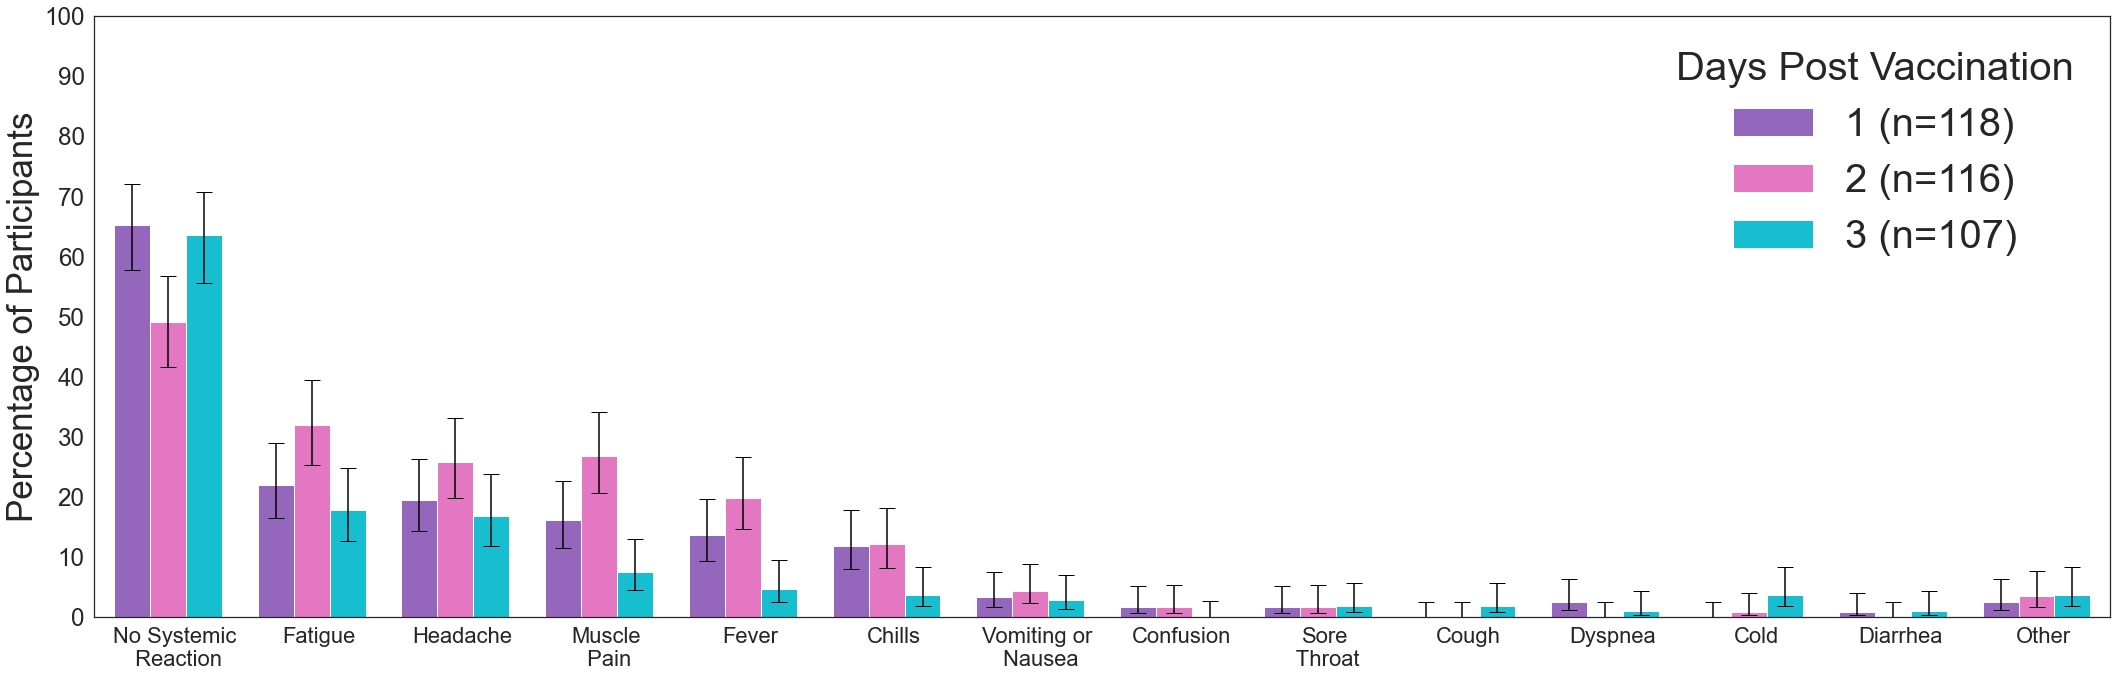

In [18]:
indicators = [
    ('1 (n=118)', fig2_data[fig2_data['day_post_vaccine']==0]), 
    ('2 (n=116)', fig2_data[fig2_data['day_post_vaccine']==1]),
    ('3 (n=107)', fig2_data[fig2_data['day_post_vaccine']==2]),
]
pal = [sns.color_palette('tab10')[4], sns.color_palette('tab10')[6], sns.color_palette('tab10')[9]]

plot_figure2(indicators,pal)

# Figure 3 - Percentage of change in chest-patch indicators for participants who reported at least one local or  systemic  reaction  and  those  who  reported  no  reaction  during  the  daytime  and  the  nighttime

In [19]:
yticks = {'rr':np.arange(-4,8,3),'hr':np.arange(-10,20,5),'co':np.arange(-10,20,5),'temp':np.arange(-0.4,1,0.4),
                'ci':np.arange(-5,25,5),'dbp':np.arange(-2,8,2),'hrv':np.arange(-20,80,20),'MAPrs':np.arange(-2,8,2),
                'pp':np.arange(-2,8,2),'sbp':np.arange(-2,8,2),'spo2':np.arange(-0.8,1.2,0.4),'sv':np.arange(-2,8,2),
                'svr':np.arange(-10,8,3),'movement':np.arange(-150,750,150)}

In [25]:
def plot_figure3(df,col,cnt,name,i,j,n,method='%'):
    
    sns.set(font_scale=5,style='white')
    g = sns.FacetGrid(df, col="day_night", height=16, aspect=1,col_order=['Day','Night'],legend_out = False)
    
    df['x1'] = df["days_since_second"]-1-0.2
    df['x2'] = df["days_since_second"]-1+0.2
    df['y1'] = df[df['category'].str.startswith('Symptomatic')][col]
    df['y2'] = df[df['category'].str.startswith('Asymptomatic')][col]
    
    g.map(sns.barplot, "days_since_second", col,  'category',capsize = 0.08,
          palette = [sns.color_palette('husl')[i],sns.color_palette('tab10')[j]],
          ci=90, 
          alpha = 0.4,
          order=[1,2,3],
          linewidth=2.5,
          errwidth=2.5,
          ec = 'black'
         )

    g.map(sns.scatterplot, "x1", "y1" ,color = sns.color_palette('husl')[i], alpha = 0.4, s=100)
    g.map(sns.scatterplot, "x2", "y2" ,color = sns.color_palette('tab10')[j], alpha = 0.4, s=100)
    
    
    g.set_titles(col_template="{col_name}",fontweight='bold')
    
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
        ax.axhline(0,ls='--',c='black')
        ax.set_yticks(2*yticks[col])
        ax.set_ylim(np.percentile(df[col].dropna(), q = 5), np.percentile(df[col].dropna(), q = 95))       
        
    if cnt == 0:
        plt.legend(loc='upper right',bbox_to_anchor=(0.7, 1.35),ncol=2)
        plt.suptitle(letters[cnt],x=0.028,y=1,fontweight='bold')
        
    if cnt == n-1:
        if method=='value': g.set_axis_labels("Days Post Vaccincation",'Mean difference in '+titles[col])
        else: g.set_axis_labels("Days Post Vaccincation",'% Change in \n'+titles[col])

    else:
        if method=='value': g.set_axis_labels("",'Mean difference in '+titles[col])
        else: g.set_axis_labels("",'% Change in \n'+titles[col])
            
    if cnt == 1:
        plt.suptitle(letters[cnt],x=0.04,y=1,fontweight='bold')  
        
    elif cnt ==2:plt.suptitle(letters[cnt],x=0.02,y=1,fontweight='bold')
    elif cnt ==3: plt.suptitle(letters[cnt],x=0.03,y=1,fontweight='bold')
    else: plt.suptitle(letters[cnt],x=0.03,y=1,fontweight='bold')
    plt.axhline(0,ls='--',c='black')
    plt.margins(y=0)
    plt.savefig('Figure3_'+name+col+'.pdf', bbox_inches='tight', dpi =300)
    plt.show()

In [26]:
indicators_figure3 = ['temp','hr','co','rr']

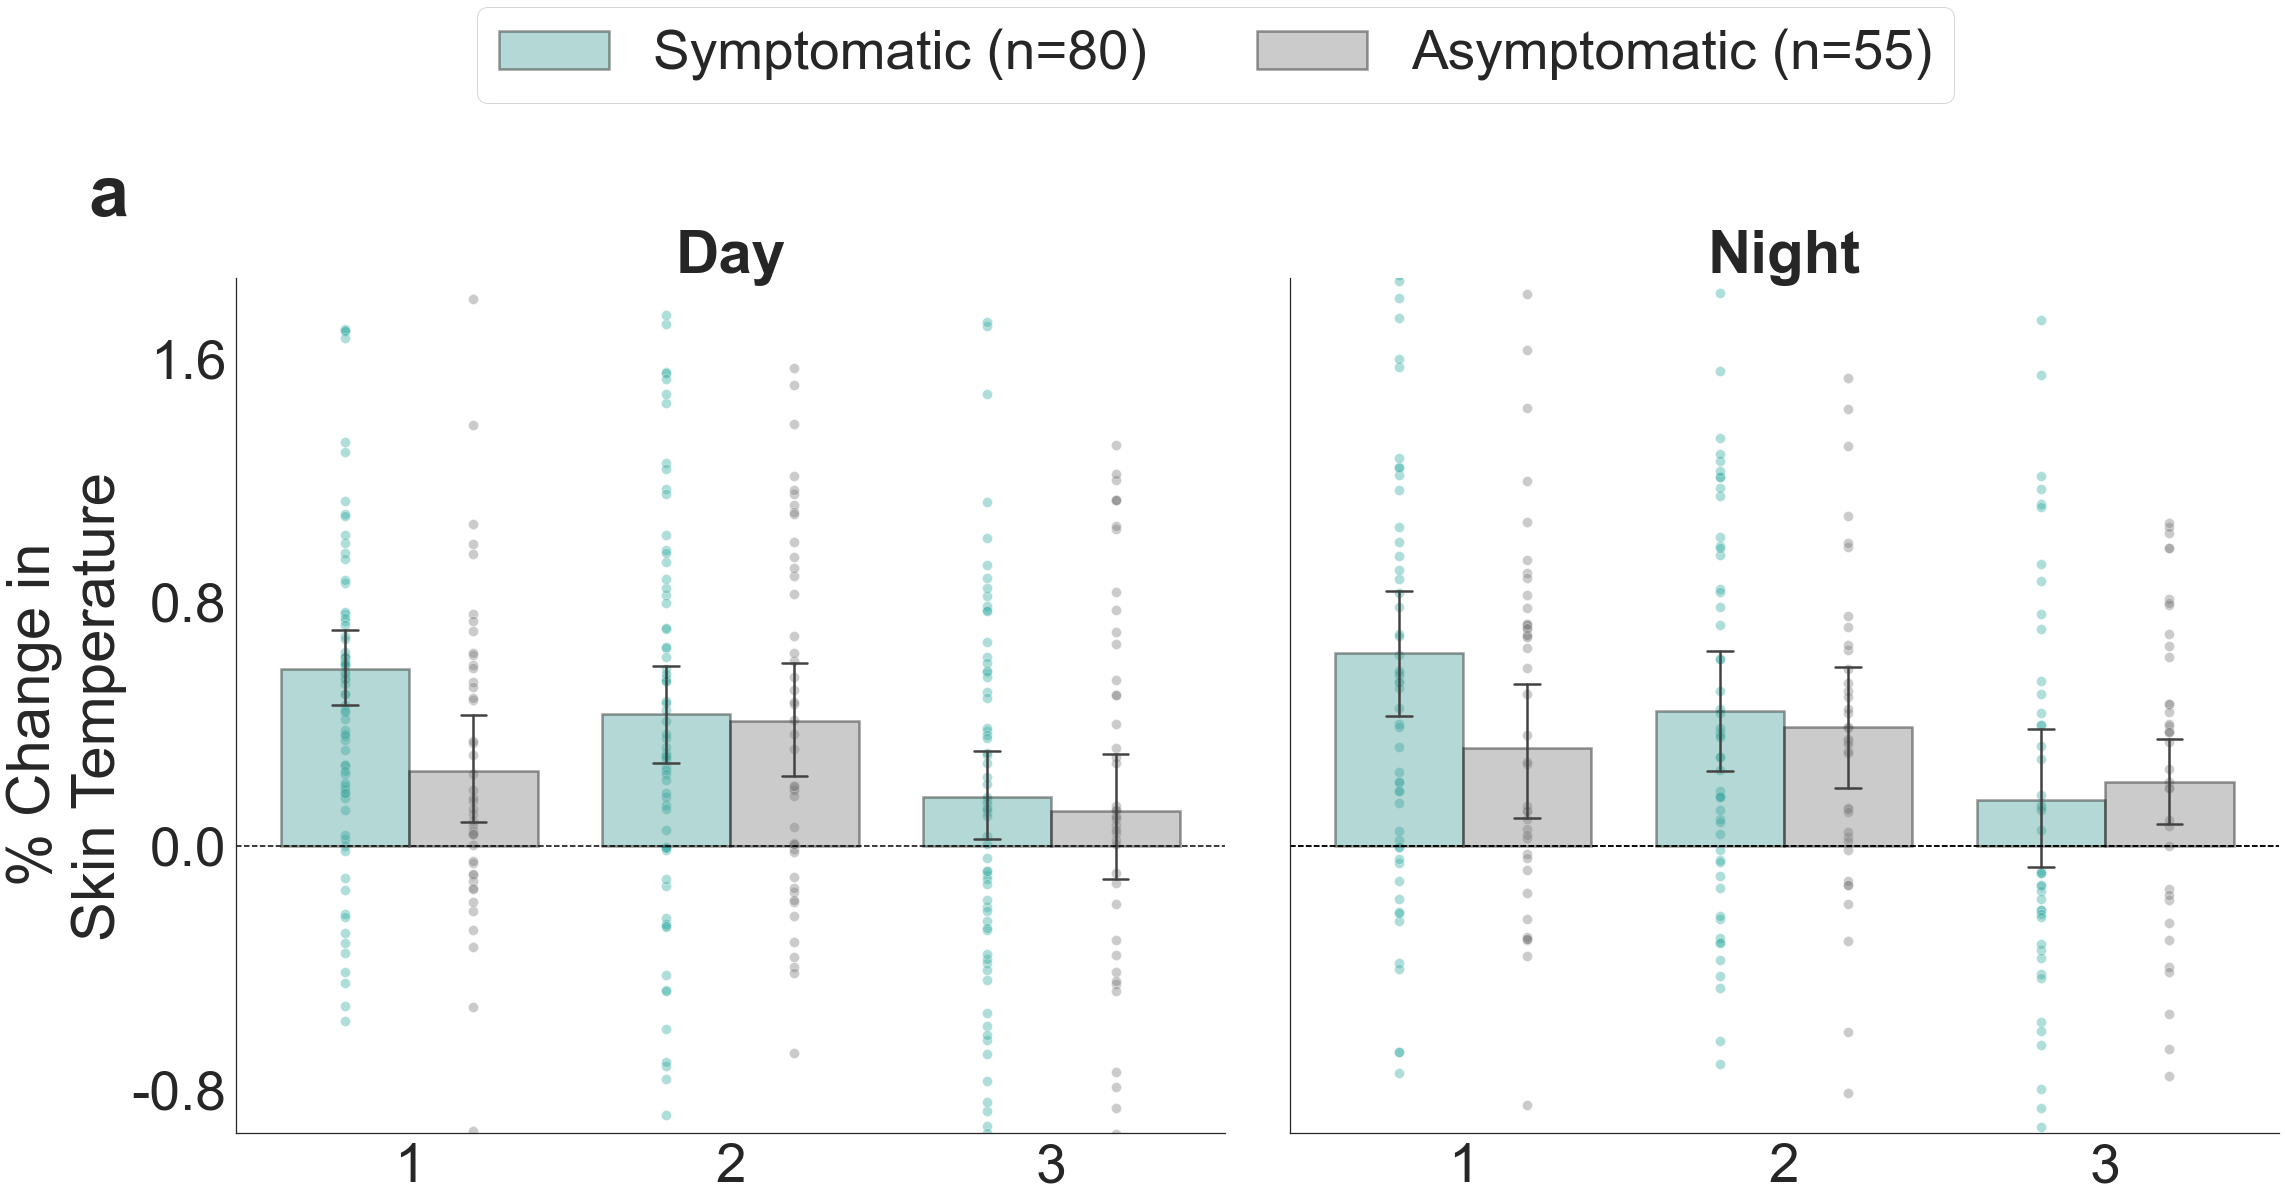

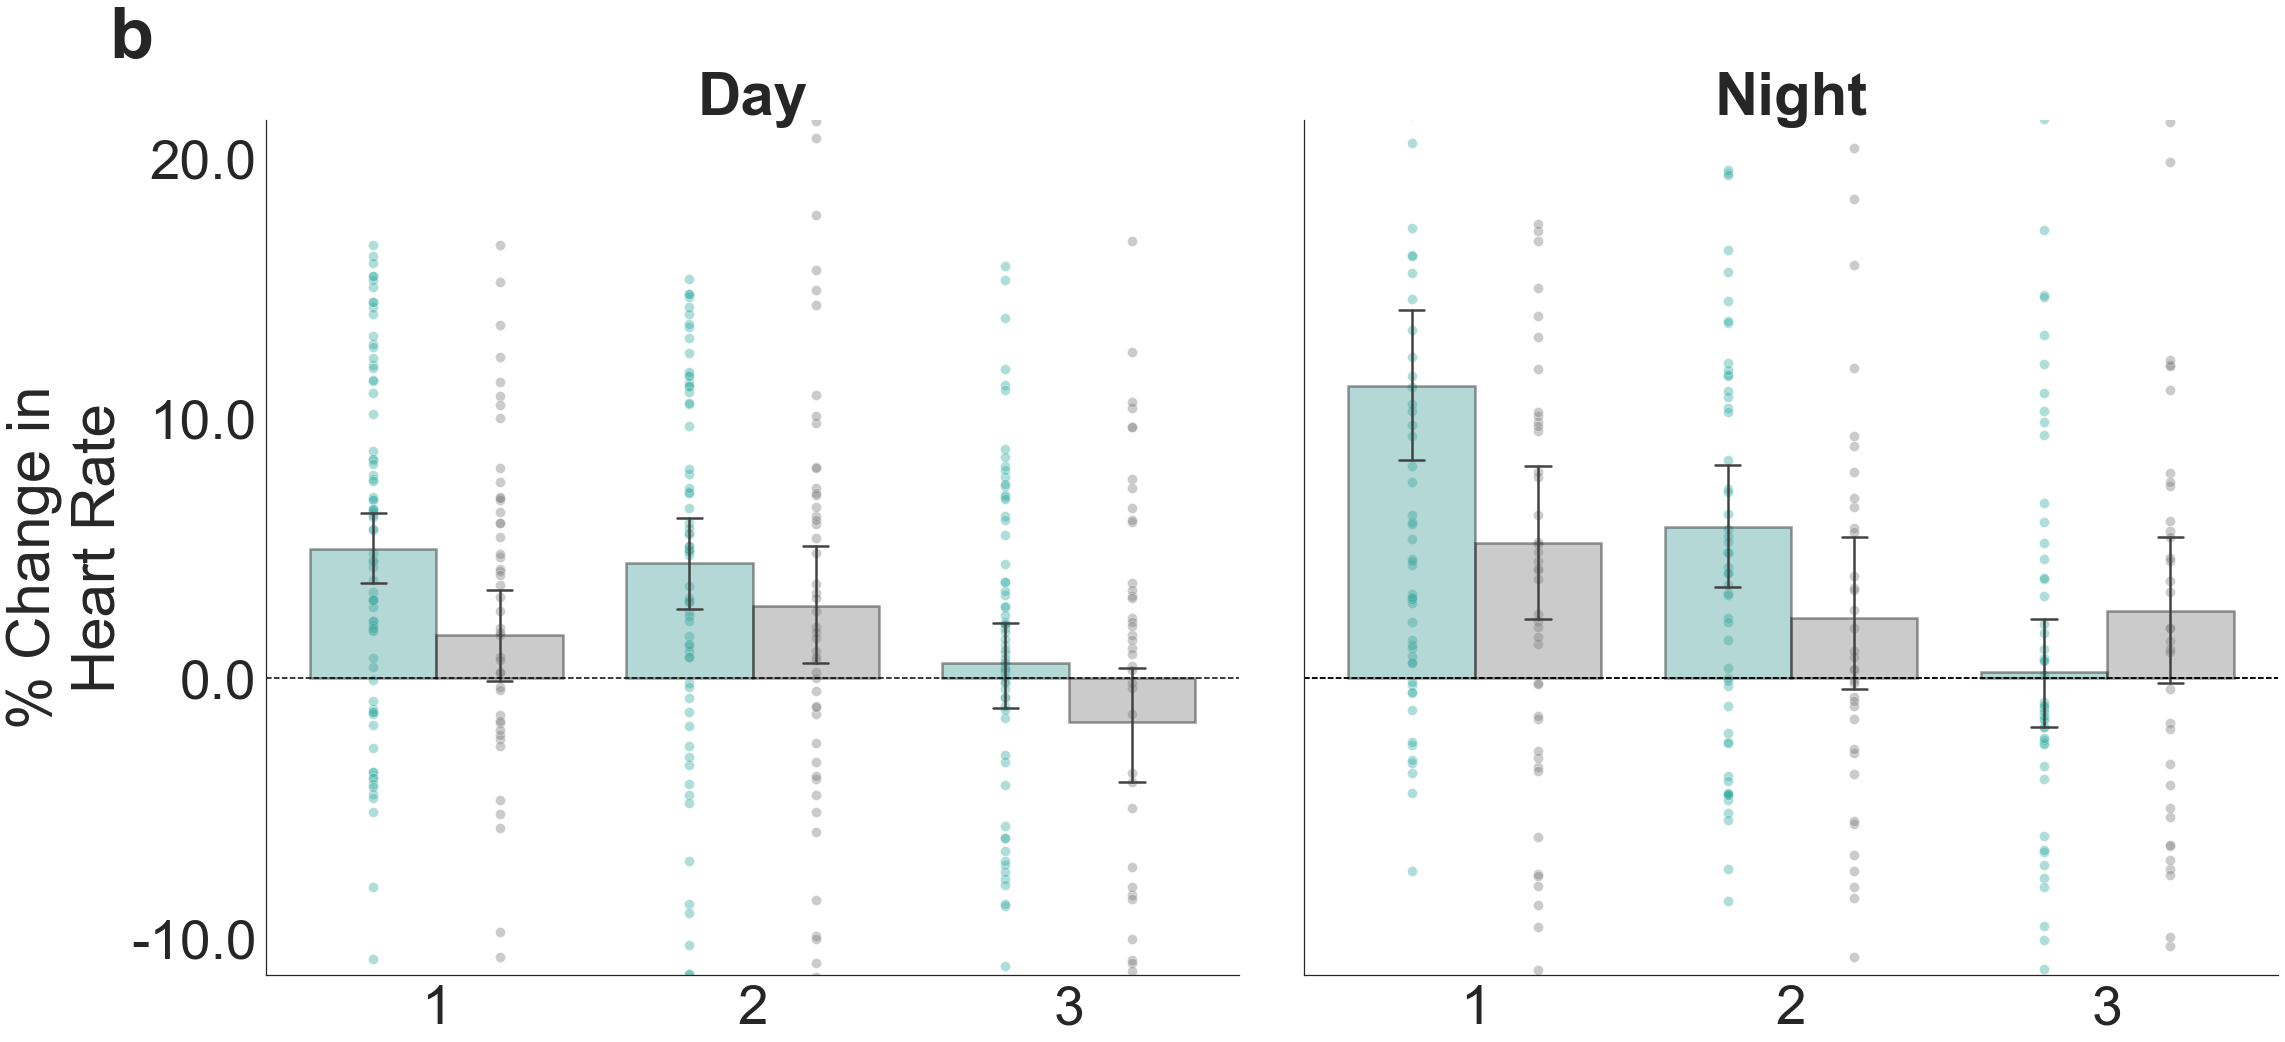

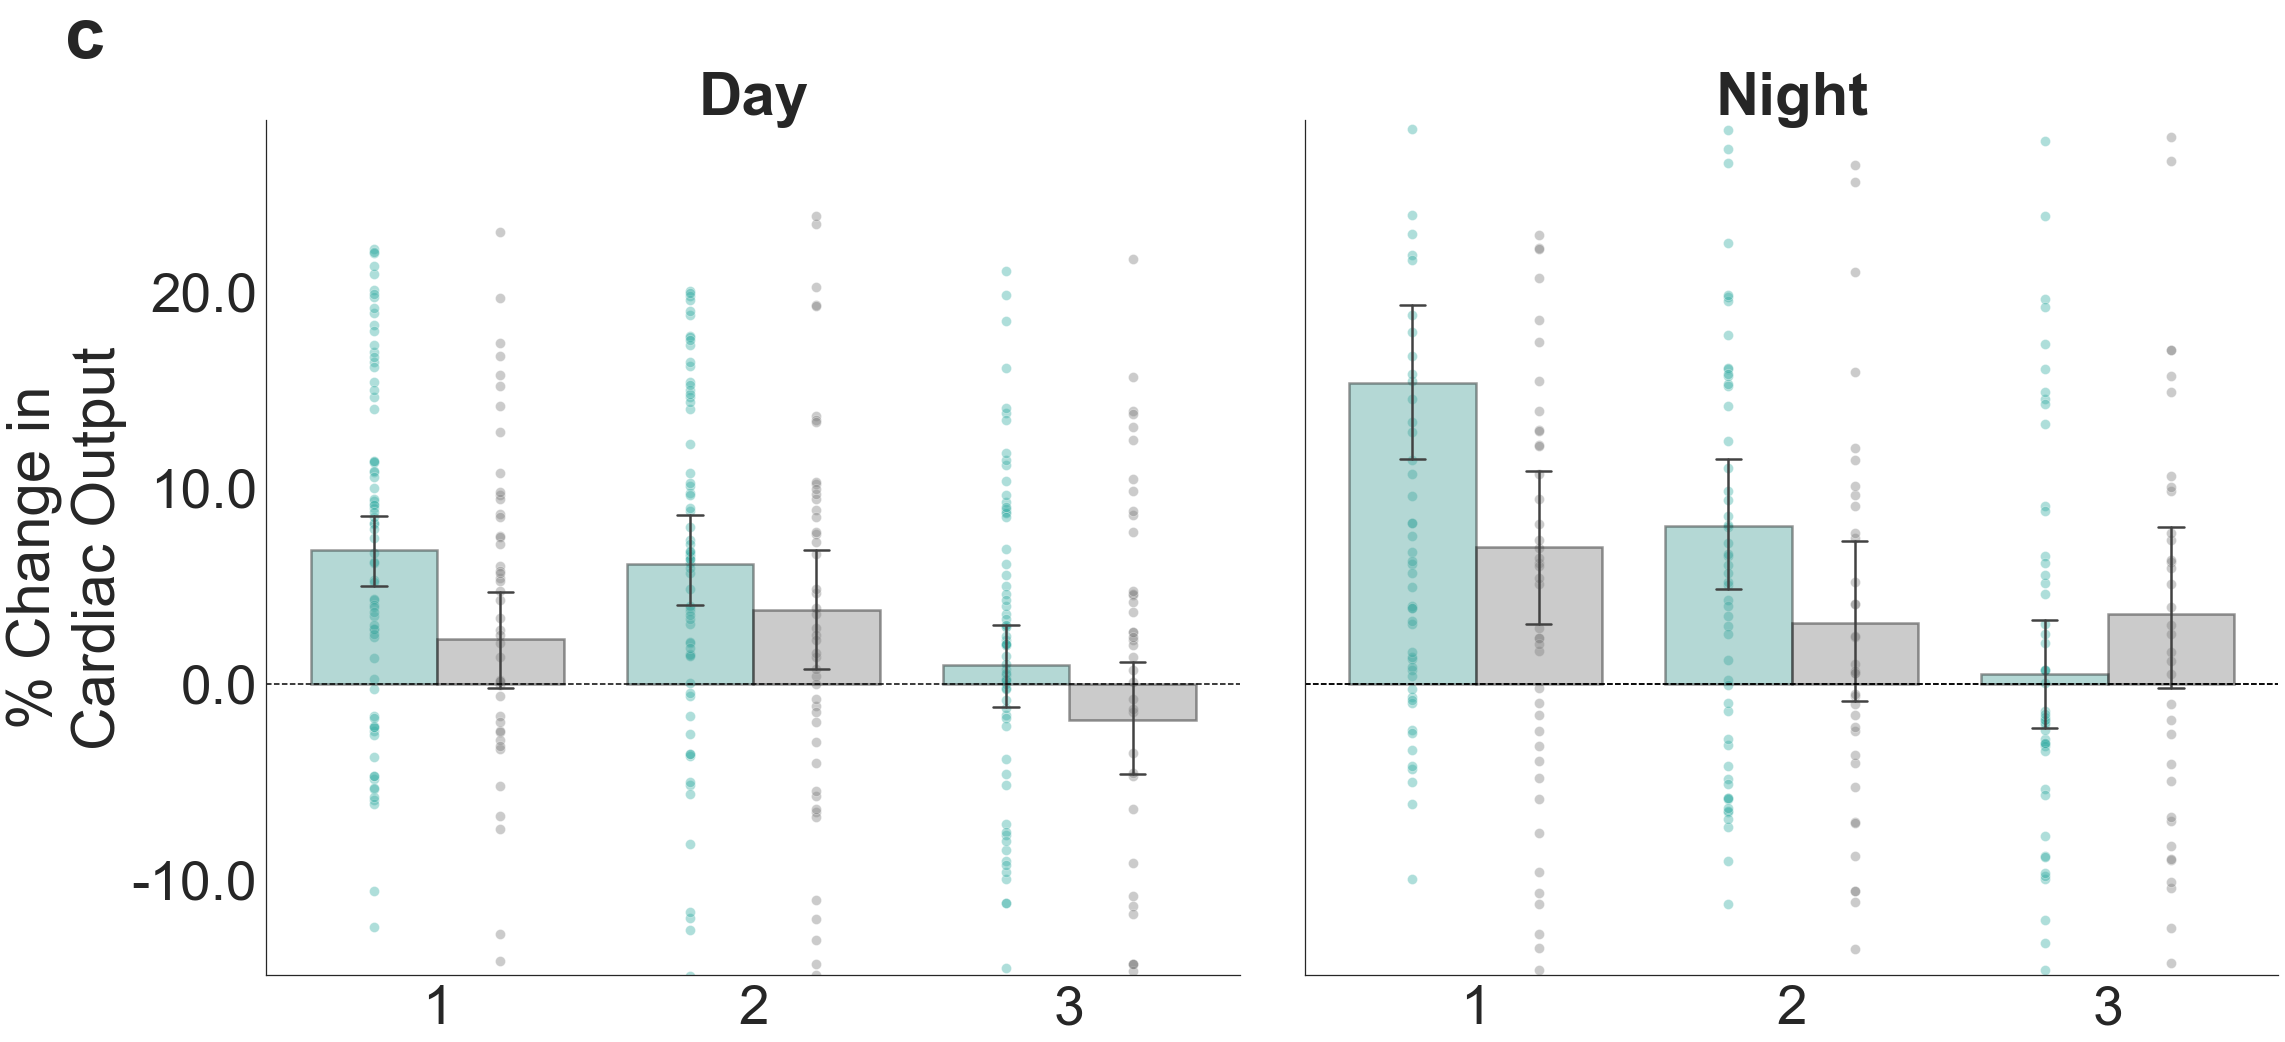

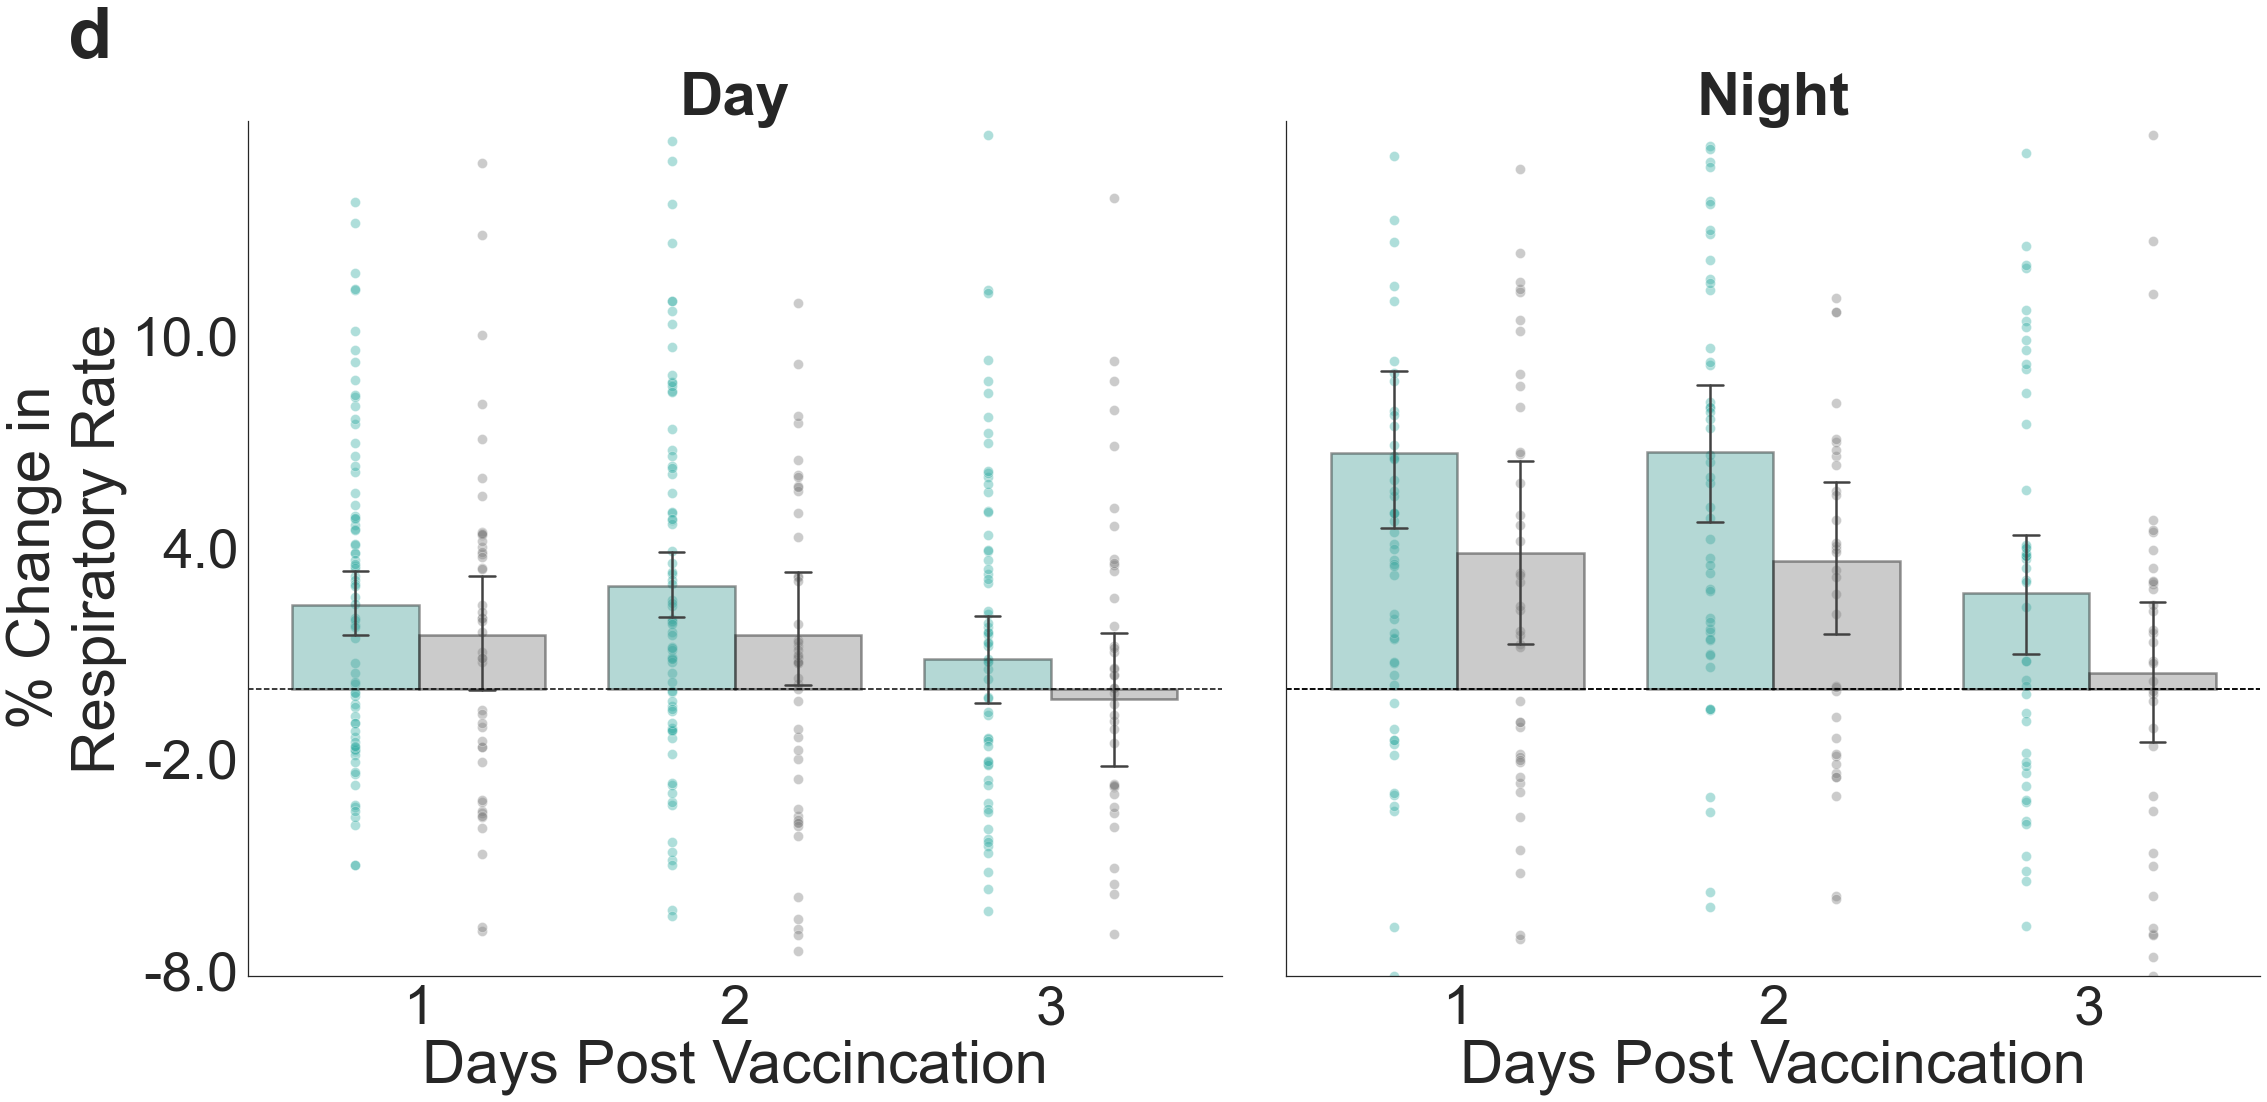

In [30]:
cnt = 0
for col in indicators_figure3:
    plot_figure3(fig3_data, col ,cnt,'symptoms_',3,7,len(indicators_figure3))
    cnt += 1 
    plt.show()
